# Parabéns !

Legal ! Você viu, até agora, diversos algoritmos de Machine Learning para tratar diversos problemas em diferentes situações: aprendizado surpervisonado e/ou aprendizado não surpervisidoado. Mas você deve estar se perguntando:

*A gente tem esse bando de ferramenta e agora? Existe uma melhor?*

A resposta é bem direta: **não**

# No Free Lunch Theorem

Existe uma máxima da área de aprendizado estatístico que basicamente diz: 

**No Algorithm is the Best**

Em outras palavras, **não existe um algoritmo santo graal que resolve todos os problemas**. Geralmente o ideal é que testemos todos os algoritmos de acordo com os dados que a gente modelou !

Isso acontece porquê um modelo é uma representação simplificada da realidade. Por ser simplificada, temos que descartar detalhes desnecessários para podermos focar nos aspectos da realidade que queremos entender (ou estimar). Essas simplificações são baseadas em algumas premissas. Essas premissas podem ser válidas em algumas situações, mas podem não ser em outras. Logo, um *modelo que explica bem uma situação sob certa premissa, pode falhar em outra*.


# Um desafio

Vamos pegar um subset do [Product Backorders](https://www.kaggle.com/tiredgeek/predict-bo-trial/data). O objetivo aqui é prever se um produto vai ser retornado (backorder?) ou não. Como feature, consideramos algumas métricas dos produtos.

In [1]:
import pandas as pd
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"

df = pd.read_csv(data_path)

In [2]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.905300e+04,19053.000000,17975.000000,19053.000000,19053.000000,19053.000000,1.905300e+04,19053.000000,19053.000000,1.905300e+04,1.905300e+04,19053.000000,19053.00000,19053.000000,19053.000000,19053.000000
mean,2.059553e+06,376.367029,7.706036,48.272346,182.910828,344.739831,4.977924e+02,56.118879,168.534457,3.335322e+02,5.042554e+02,48.840708,2.31150,-6.519834,-6.053935,0.891776
std,6.633376e+05,7002.071629,6.778665,1465.999210,4304.865592,8406.062155,1.218057e+04,1544.217778,4581.340080,9.294566e+03,1.418415e+04,968.773868,110.24106,25.975139,25.184497,23.033345
min,1.111620e+06,-1440.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,-99.000000,-99.000000,0.000000
25%,1.510598e+06,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.630000,0.650000,0.000000
50%,1.923192e+06,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,3.000000e+00,5.000000e+00,0.000000,0.00000,0.820000,0.800000,0.000000
75%,2.828574e+06,63.000000,8.000000,0.000000,9.000000,20.000000,3.000000e+01,5.000000,16.000000,3.200000e+01,4.700000e+01,3.000000,0.00000,0.960000,0.950000,0.000000
max,3.284775e+06,730722.000000,52.000000,170920.000000,479808.000000,967776.000000,1.418208e+06,186451.000000,550609.000000,1.136154e+06,1.759152e+06,85584.000000,13824.00000,1.000000,1.000000,1440.000000


In [10]:
y = "went_on_backorder"
x = [i for i in df.columns if i != y and i !='sku']

## Como você resolveria?

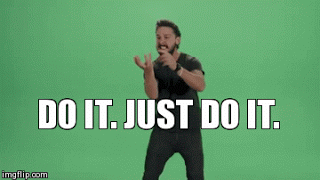